In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
plt.rc('figure', facecolor='w', figsize=[4,3])

In [84]:
sizes = """
    31422652 simulated-chm13v2.0-10X-length-2000.fa
    15595416 simulated-chm13v2.0-10X-length-4000.fa
    10394140 simulated-chm13v2.0-10X-length-6000.fa
    7795594 simulated-chm13v2.0-10X-length-8000.fa
    6236392 simulated-chm13v2.0-10X-length-10000.fa
    5196204 simulated-chm13v2.0-10X-length-12000.fa
    4453090 simulated-chm13v2.0-10X-length-14000.fa

"""

evals = """
paftools.js mapeval minimap-2000.paf
Q       60      14104837        0       0.000000000     14104837
paftools.js mapeval minimap-4000.paf
Q       60      7153365 0       0.000000000     7153365
paftools.js mapeval minimap-6000.paf
Q       60      4897194 0       0.000000000     4897194
paftools.js mapeval minimap-8000.paf
Q       60      3710741 0       0.000000000     3710741
paftools.js mapeval minimap-10000.paf
Q       60      2884549 0       0.000000000     2884549
paftools.js mapeval minimap-12000.paf
Q       60      2490385 0       0.000000000     2490385
paftools.js mapeval minimap-14000.paf
Q 60      2127496 0       0.000000000     2127496


paftools.js mapeval mapquik-2000.paf
Q       60      4355745 1       0.000000230     4355745
paftools.js mapeval mapquik-4000.paf
Q       60      5275092 5       0.000000948     5275092
paftools.js mapeval mapquik-6000.paf
Q       60      4573473 0       0.000000000     4573473
paftools.js mapeval mapquik-8000.paf
Q       60      3619010 1       0.000000276     3619010
paftools.js mapeval mapquik-10000.paf
Q       60      2926687 2       0.000000683     2926687
paftools.js mapeval mapquik-12000.paf
Q       60      2450607 0       0.000000000     2450607
paftools.js mapeval mapquik-14000.paf
Q       60      2107863 3       0.000001423     2107863
"""

d_sizes = {}
for line in sizes.split('\n'):
    if len(line.split()) != 2: continue
    nb, name = line.split()
    length = int(name.split("-")[-1].split('.')[0])
    nb = int(nb)//2
    d_sizes[length]=nb

d_evals = {}
entry = None
for line in evals.split('\n'):
    ls = line.split()
    if len(ls) == 0: continue
    if len(ls) == 3:
        tool  = ls[-1].split('-')[0]
        length = int(ls[-1].split('-')[-1].split('.')[0])
        entry = (tool,length)
        d_evals[entry]=0
    else:
        n_mapped_60 = int(ls[2])
        d_evals[entry]=n_mapped_60

data_divs=[]
for tool, length in d_evals:
    if tool == "mapquik":
        tool2 = "mapquik\nk=5, l=31, density=0.01"
    elif tool == "minimap":
        tool2 = "minimap2\n-x map-hifi"
    data_divs += [(tool2,length,d_evals[(tool,length)]/d_sizes[length])]

data_divs

[('minimap2\n-x map-hifi', 2000, 0.8977496234245282),
 ('minimap2\n-x map-hifi', 4000, 0.9173676418763052),
 ('minimap2\n-x map-hifi', 6000, 0.9422990261820603),
 ('minimap2\n-x map-hifi', 8000, 0.9520098147748587),
 ('minimap2\n-x map-hifi', 10000, 0.9250698160090001),
 ('minimap2\n-x map-hifi', 12000, 0.9585401189021832),
 ('minimap2\n-x map-hifi', 14000, 0.9555144854471839),
 ('mapquik\nk=5, l=31, density=0.01', 2000, 0.27723598886561196),
 ('mapquik\nk=5, l=31, density=0.01', 4000, 0.6764926309115448),
 ('mapquik\nk=5, l=31, density=0.01', 6000, 0.8800098901881253),
 ('mapquik\nk=5, l=31, density=0.01', 8000, 0.9284757518157051),
 ('mapquik\nk=5, l=31, density=0.01', 10000, 0.9385833988626757),
 ('mapquik\nk=5, l=31, density=0.01', 12000, 0.9432297115355748),
 ('mapquik\nk=5, l=31, density=0.01', 14000, 0.946696788073001)]

                    Tool, parameters  readlength  \% Mapped Q60
0              minimap2\n-x map-hifi        2000       0.897750
1              minimap2\n-x map-hifi        4000       0.917368
2              minimap2\n-x map-hifi        6000       0.942299
3              minimap2\n-x map-hifi        8000       0.952010
4              minimap2\n-x map-hifi       10000       0.925070
5              minimap2\n-x map-hifi       12000       0.958540
6              minimap2\n-x map-hifi       14000       0.955514
7   mapquik\nk=5, l=31, density=0.01        2000       0.277236
8   mapquik\nk=5, l=31, density=0.01        4000       0.676493
9   mapquik\nk=5, l=31, density=0.01        6000       0.880010
10  mapquik\nk=5, l=31, density=0.01        8000       0.928476
11  mapquik\nk=5, l=31, density=0.01       10000       0.938583
12  mapquik\nk=5, l=31, density=0.01       12000       0.943230
13  mapquik\nk=5, l=31, density=0.01       14000       0.946697


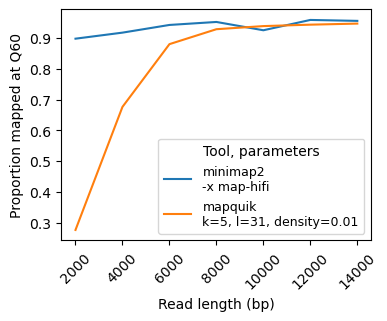

In [85]:
df = pd.DataFrame([x for x in data_divs],columns=("Tool, parameters","readlength","\% Mapped Q60"))
print(df)
sns_plot = sns.lineplot(data=df,x="readlength",y="\% Mapped Q60",hue="Tool, parameters")
#ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
#sns_plot.set_yticklabels(ylabels)
#plt.xticks(sns_plot.get_xticks(), list(map(lambda x:"%d"%x,sns_plot.get_xticks())))
sns_plot.set(xlabel='Read length (bp)', ylabel='Proportion mapped at Q60')
plt.setp(sns_plot.get_legend().get_texts(), fontsize='9') 
plt.xticks(rotation=45)
fig = sns_plot.get_figure()
plt.show()

fig.savefig("readlengths_analysis.pdf", bbox_inches='tight', dpi = 300)
